## Import Libraries

In [60]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
warnings.filterwarnings('ignore')

## Load Data

In [61]:
df = pd.read_csv('used car.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,City,State,Car_Description
0,sx4,2008,17.08,32.38,17910,CNG,Dealer,Automatic,0,West Brendaview,California,Speech partner seek expert guess move million ...
1,vitara brezza,2023,20.05,19.48,110452,Petrol,Individual,Manual,2,East Christopher,Kentucky,Prepare song their which sea.
2,ritz,2006,14.25,34.10,81514,Diesel,Individual,Automatic,1,North Robertmouth,Delaware,System score human some argue provide.
3,swift,2018,23.38,34.16,166408,Diesel,Dealer,Manual,1,Haydenborough,Arizona,Probably day yes interest.
4,ciaz,2018,17.70,14.07,56638,Petrol,Dealer,Automatic,1,Port Kaylafort,Illinois,Present win hundred big wrong.
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sx4,2007,20.18,28.66,124033,Diesel,Individual,Automatic,0,Port Rubenhaven,Montana,Partner center analysis he thank.
9996,baleno,2008,13.24,9.68,51176,Petrol,Individual,Manual,2,New Clintonstad,California,Little network view move.
9997,wagon r,2015,9.99,23.66,88358,Petrol,Dealer,Automatic,0,Sherryport,New Mexico,Bar well sport some old art.
9998,ertiga,2005,2.97,15.35,46289,CNG,Individual,Automatic,1,Ronaldshire,Texas,Always letter avoid even.


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Car_Name         10000 non-null  object 
 1   Year             10000 non-null  int64  
 2   Selling_Price    10000 non-null  float64
 3   Present_Price    10000 non-null  float64
 4   Kms_Driven       10000 non-null  int64  
 5   Fuel_Type        10000 non-null  object 
 6   Seller_Type      10000 non-null  object 
 7   Transmission     10000 non-null  object 
 8   Owner            10000 non-null  int64  
 9   City             10000 non-null  object 
 10  State            10000 non-null  object 
 11  Car_Description  10000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 937.6+ KB


## Data Cleaning

In [63]:
display(HTML(df.isnull().sum().to_frame().to_html()))

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0
City,0


In [64]:
df.duplicated().sum()

0

## Data Visualization

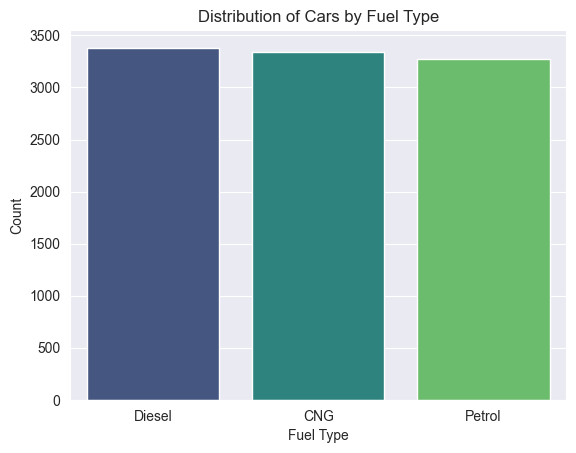

In [65]:
sns.countplot(data=df, x="Fuel_Type", order=df["Fuel_Type"].value_counts().index, palette="viridis")
plt.title("Distribution of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

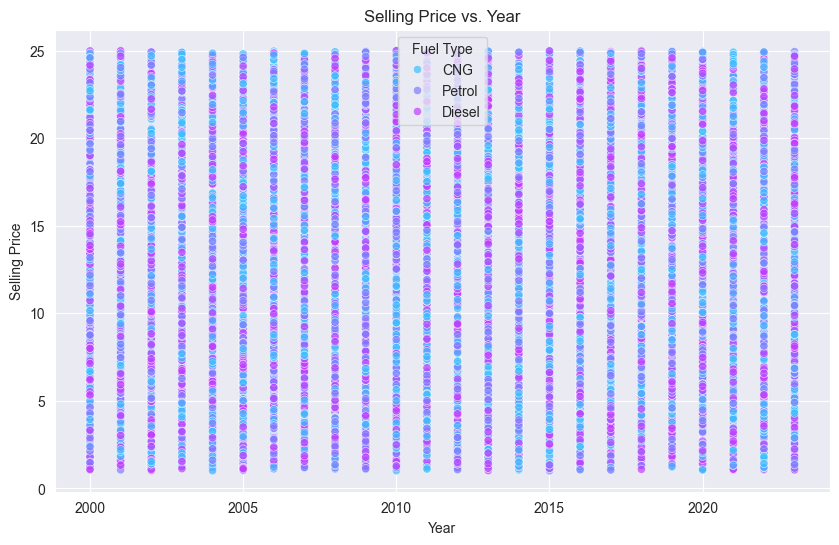

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Year", y="Selling_Price", alpha=0.7, hue="Fuel_Type", palette="cool")
plt.title("Selling Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type")
plt.show()

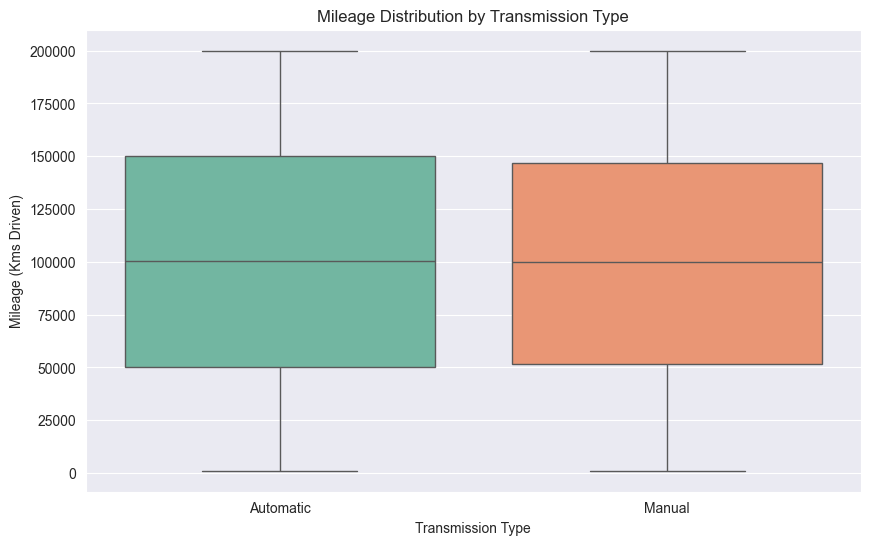

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Transmission", y="Kms_Driven", palette="Set2")
plt.title("Mileage Distribution by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Mileage (Kms Driven)")
plt.show()

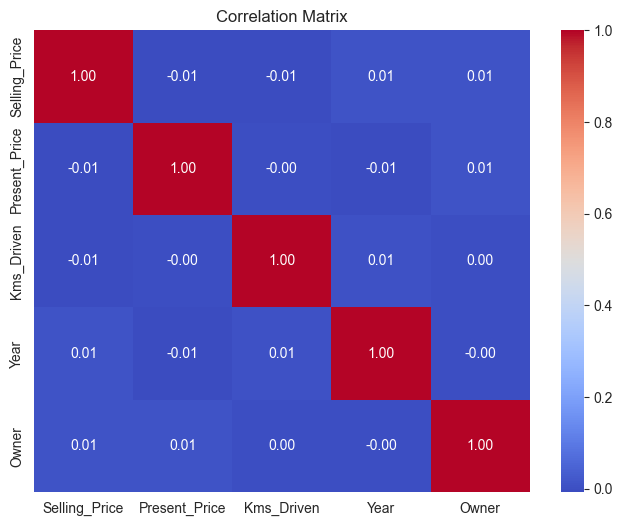

In [68]:
corr_matrix = df[["Selling_Price", "Present_Price", "Kms_Driven", "Year", "Owner"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

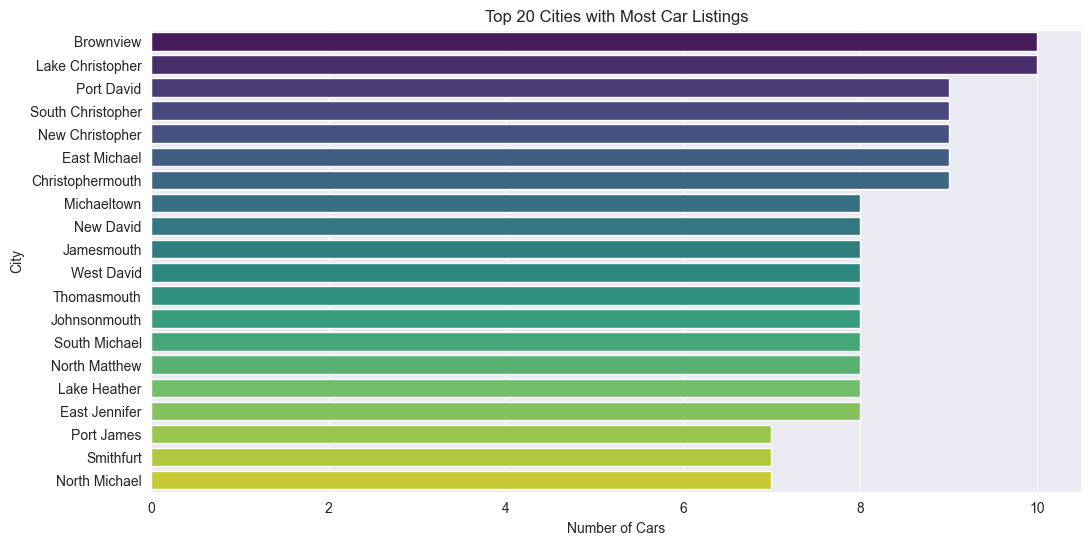

In [69]:
top_cities = df["City"].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="viridis")
plt.title("Top 20 Cities with Most Car Listings")
plt.xlabel("Number of Cars")
plt.ylabel("City")
plt.show()

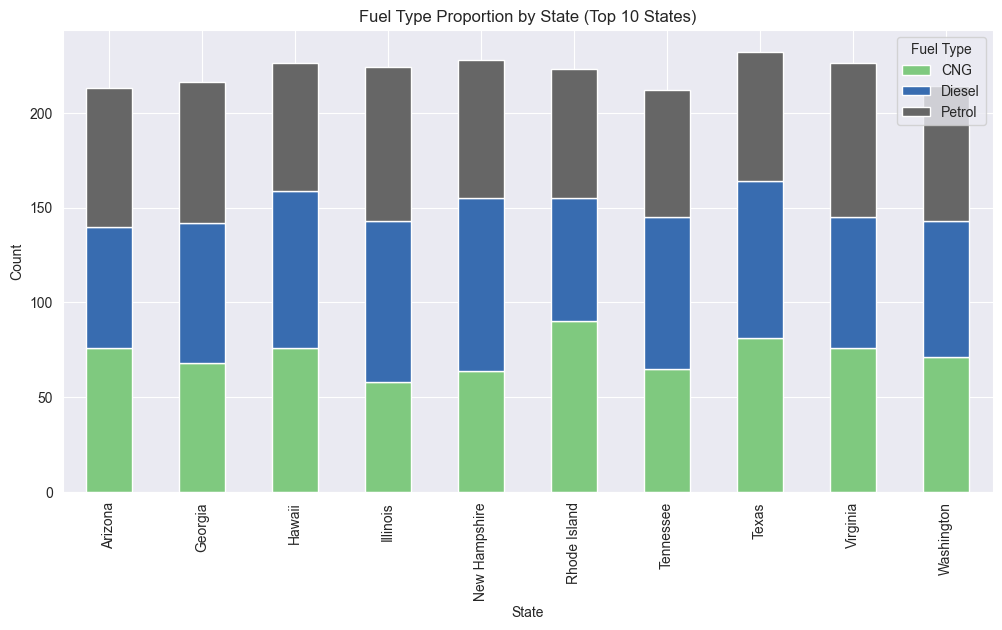

In [70]:
top_states = df["State"].value_counts().head(10).index
state_fuel = df[df["State"].isin(top_states)].groupby(["State", "Fuel_Type"]).size().unstack()

state_fuel.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Accent")
plt.title("Fuel Type Proportion by State (Top 10 States)")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend(title="Fuel Type")
plt.show()

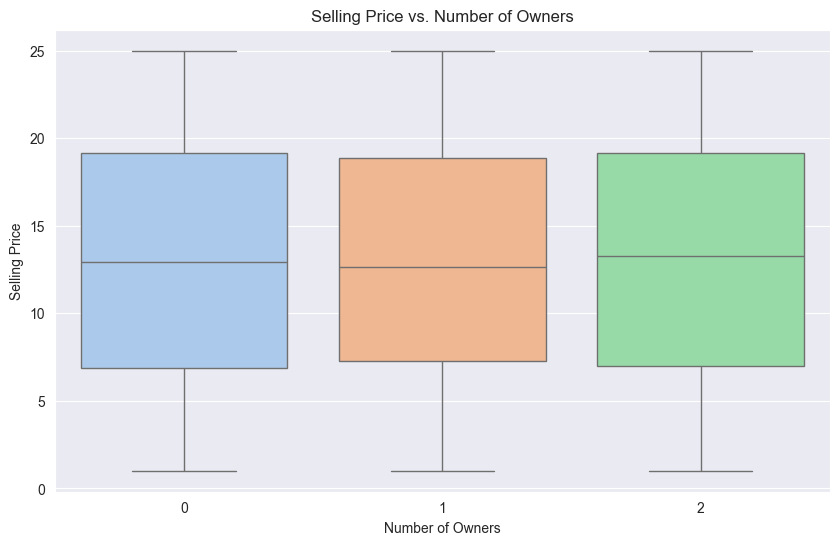

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Owner", y="Selling_Price", palette="pastel")
plt.title("Selling Price vs. Number of Owners")
plt.xlabel("Number of Owners")
plt.ylabel("Selling Price")
plt.show()

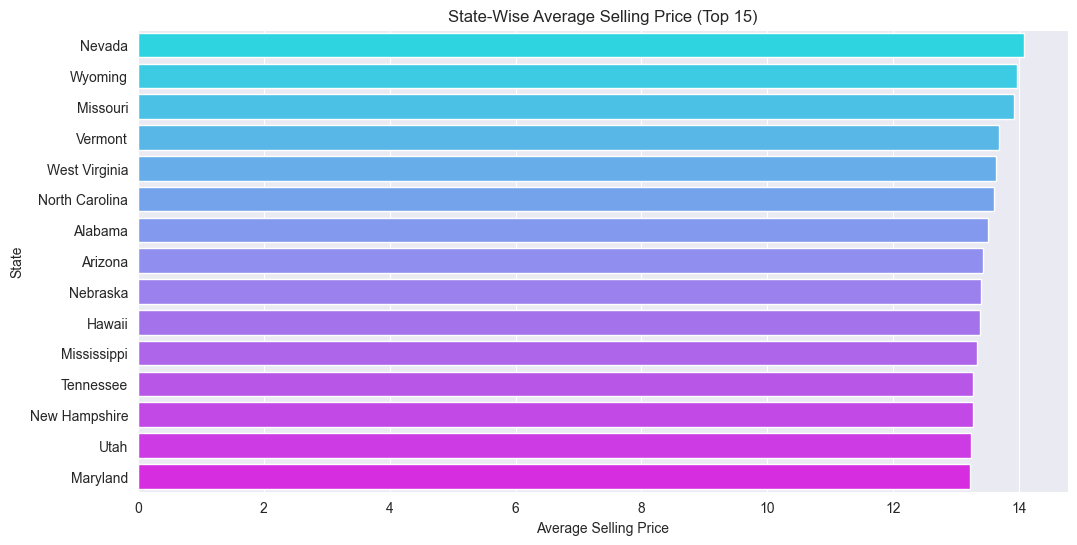

In [72]:
avg_price_state = df.groupby("State")["Selling_Price"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_state.values, y=avg_price_state.index, palette="cool")
plt.title("State-Wise Average Selling Price (Top 15)")
plt.xlabel("Average Selling Price")
plt.ylabel("State")
plt.show()

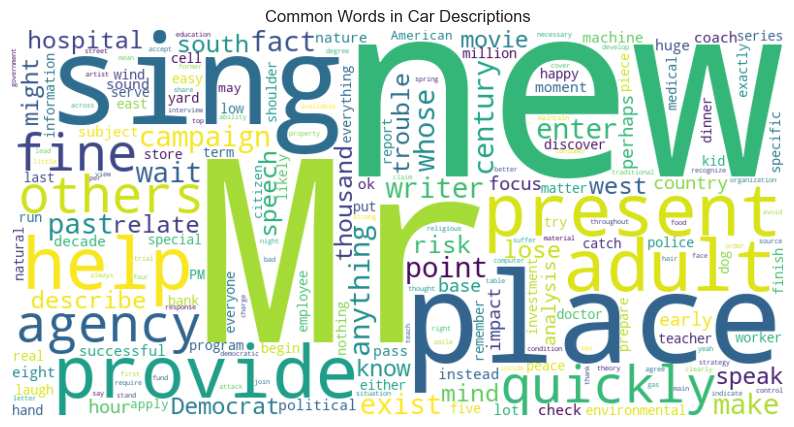

In [73]:
from wordcloud import WordCloud

text = " ".join(desc for desc in df["Car_Description"].dropna())
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Car Descriptions")
plt.show()

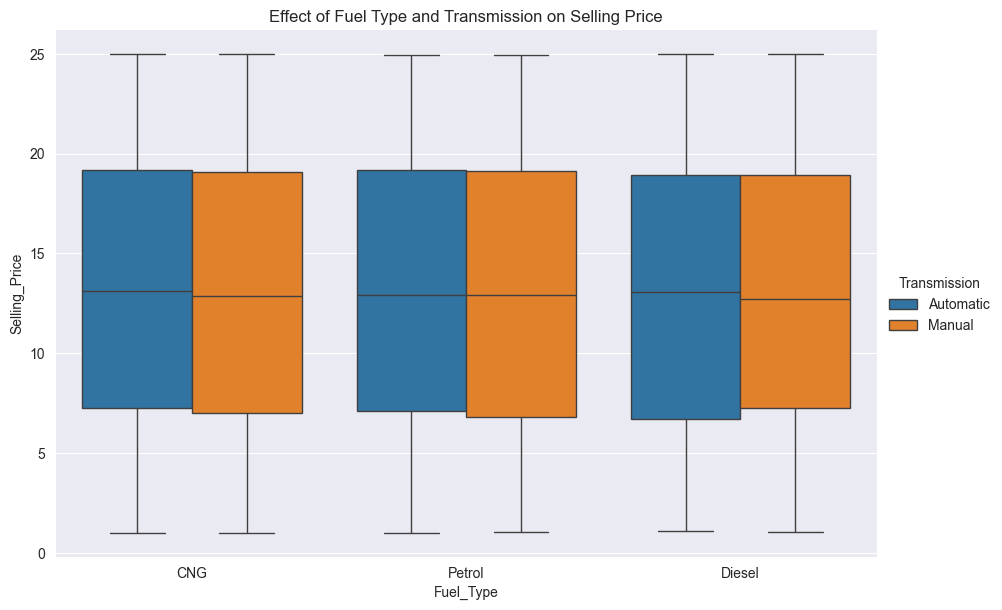

In [74]:
sns.catplot(data=df, x="Fuel_Type", y="Selling_Price", hue="Transmission", kind="box", height=6, aspect=1.5)
plt.title("Effect of Fuel Type and Transmission on Selling Price")
plt.show()

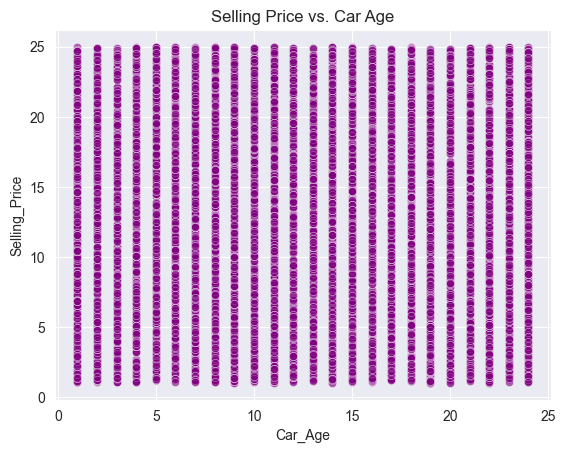

In [75]:
df['Car_Age'] = 2024 - df['Year']
sns.scatterplot(data=df, x="Car_Age", y="Selling_Price", alpha=0.6, color="purple")
plt.title("Selling Price vs. Car Age")
plt.show()

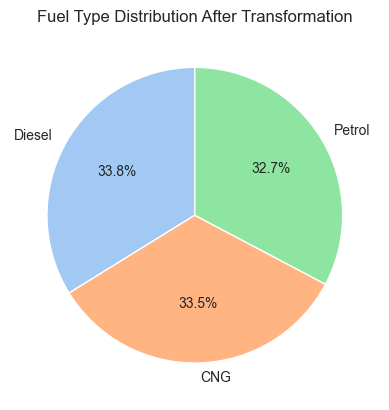

In [76]:
transformed = df['Fuel_Type'].value_counts()
plt.pie(transformed.values, labels=transformed.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Fuel Type Distribution After Transformation")
plt.show()

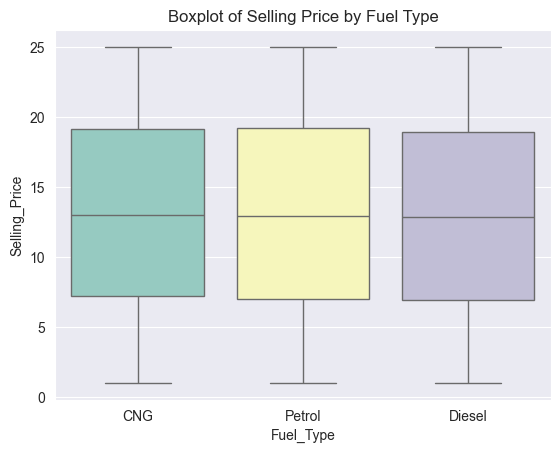

In [77]:
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price', palette='Set3')
plt.title('Boxplot of Selling Price by Fuel Type')
plt.show()

## Data Preprocessing

In [78]:
numeric_cols = df.select_dtypes(include=['number'])

In [79]:
numeric_cols.skew()

Year             0.019505
Selling_Price    0.008278
Present_Price   -0.009932
Kms_Driven       0.005467
Owner            0.008462
Car_Age         -0.019505
dtype: float64

In [80]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'City', 'State',
       'Car_Description', 'Car_Age'],
      dtype='object')

In [81]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3382
CNG       3345
Petrol    3273
Name: count, dtype: int64

In [82]:
df['Seller_Type'].value_counts()

Seller_Type
Individual    5045
Dealer        4955
Name: count, dtype: int64

In [83]:
df['Transmission'].value_counts()

Transmission
Automatic    5008
Manual       4992
Name: count, dtype: int64

In [86]:
df.columns = df.columns.str.strip()

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
numeric_columns = ['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']

df.columns = df.columns.str.strip()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns),  # Encoding
        ('num', StandardScaler(), numeric_columns)  # Scaling
    ]
)

In [88]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,